###setup

In [1]:
%matplotlib inline

/usr/local/python-2.7.6/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/python-2.7.6/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from showit import image, tile
import matplotlib.animation as animation

In [4]:
from os.path import join, exists
from os import mkdir, makedirs

In [5]:
import thunder

In [6]:
from registration import CrossCorr

###set directory and session information

In [7]:
directory = '/tier2/freeman/Nick/lfov.calibration'

In [8]:
key = '2015-12-14-lowRes'
name = 'anm-0266809'

In [9]:
path = join(directory, 'processed', name, key)

###load data

In [10]:
data = thunder.images.frombinary(join(path, 'images'), engine=sc, order='F')

In [54]:
data.cache();

###register data

In [11]:
reference = data[:30].mean().toarray()

In [38]:
algorithm = CrossCorr(axis=0)

In [39]:
model = algorithm.fit(data, reference)

In [40]:
registered = model.transform(data)

In [23]:
registered

Images
mode: spark
dtype: int16
shape: (4668, 468, 468)

###save raw data

In [24]:
savepath = join(directory, 'processed', name, key, 'registered')
if not exists(savepath):
    makedirs(savepath)

In [25]:
registered.tobinary(savepath, overwrite=True)

###inspect shifts

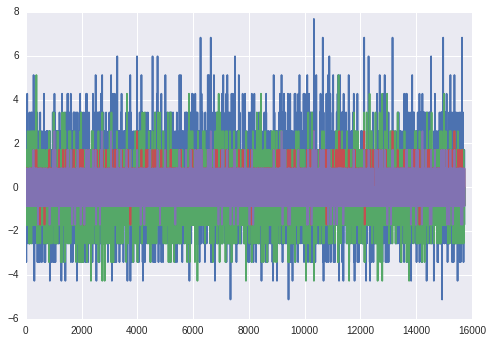

In [46]:
[plt.plot(model.toarray()[:,i,:]) for i in range(2)];

###inspect data

In [57]:
mean = registered.mean().toarray()

In [58]:
mean.shape

(500, 468)

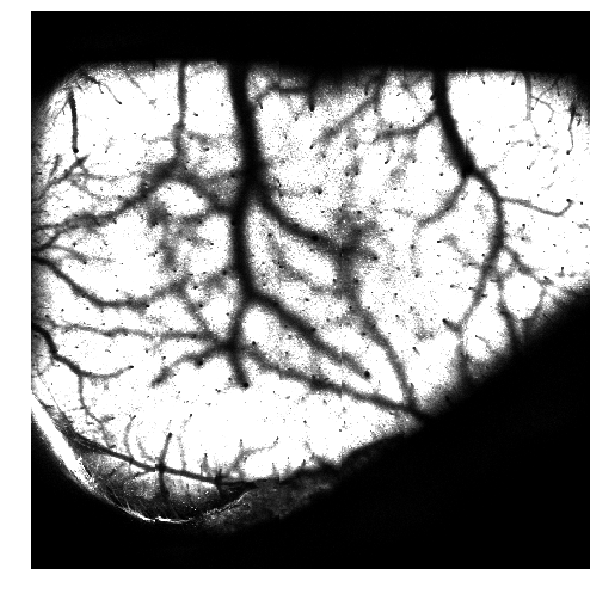

In [21]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
im = image(reference[31:31+468,:], clim=(0, 800), ax=ax)

In [ ]:
#tmpX = data[:,512:,:,0].values
#tmpY = data[:,:512,:,1].values
#data = thunder.images.fromarray(tmpX.concatenate(tmpY,3))